# Load a trained MACE model

In this notebook, the flow of loading a trained MACE model, step by step.

In [1]:

import matplotlib           as mpl

from matplotlib          import rcParams, rc
rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'font.size': 10})
rc('font', family='serif')
rc('text', usetex=True)

from pathlib import Path
import sys

parentpath = str(Path().cwd())[:-16]

sys.path.append(parentpath)

import src.mace.test            as test
import src.mace.load            as load


dt_fracts = {4 : 0.296, 5: 0.269,8: 0.221,10: 0.175,12: 0.146,16: 0.117,20: 0.09,25: 0.078,32: 0.062,48: 0.043,64: 0.033,128: 0.017}

%reload_ext autoreload
%autoreload 2

/STER/silkem/MACE/
/STER/silkem/MACE/


## Loading the model
Setting the directory of the model.


In [7]:
outloc  = parentpath+'model/'
# dirname = '20240516_143556'     ## analogue to int2 model
dirname = '20240604_160152'     ## analogue to int4 model

Loading the trained model.

In [8]:
trained = load.Trained_MACE(outloc=outloc, dirname=dirname, epoch=7)
meta = trained.get_meta()
model = trained.model

The model has 284692 trainable parameters


Plotting the evolution of the loss function.

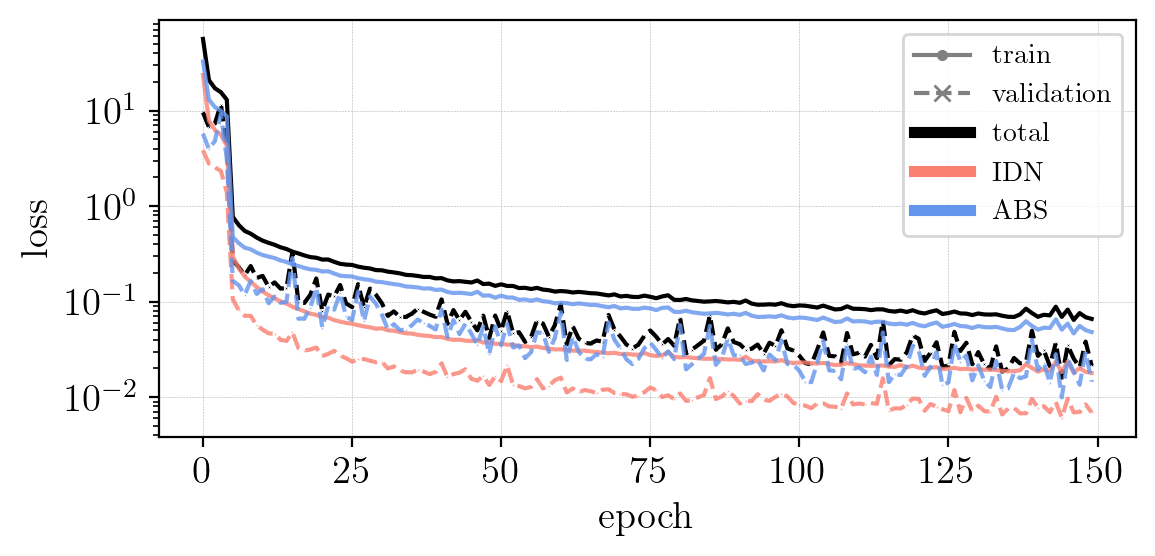

In [9]:
lossfig = trained.plot_loss(save=True)

## Testing the model

In the directory 'data/test/' there are three test models given on which the loaded model can be tested. There is a low-density model, mid-density, and high-density model available.

-------------------
Input of test model
-------------------
Mdot [Msol/yr]:       2e-08
v [km/s]:             2.5
Density proxi Mdot/v: 8e-14

Temp at 1e16 cm [K]:  75.39
Tstar:                2300.0
eps:                  0.55
-------------------

>>> Testing step...
Solving time [s]: 0.003964424133300781

>>> Testing evolution...
Solving time [s]: 0.3974740505218506
Total   time [s]: 0.3994736671447754

>>> Denormalising... 

Errors (following Eq. 23 of Maes et al., 2024):
      Step error: 5.208
 Evolution error: 24.375

>>> Plotting...
No species specified, using a default list:
     CO, H2O, OH, C2H2, C2H, CH3C5NH+, C10H2+

Step test plot saved as /STER/silkem/MACE/model/20240604_160152/step_low_dens.png
Evolution test plot saved as /STER/silkem/MACE/model/20240604_160152/evol_low_dens.png


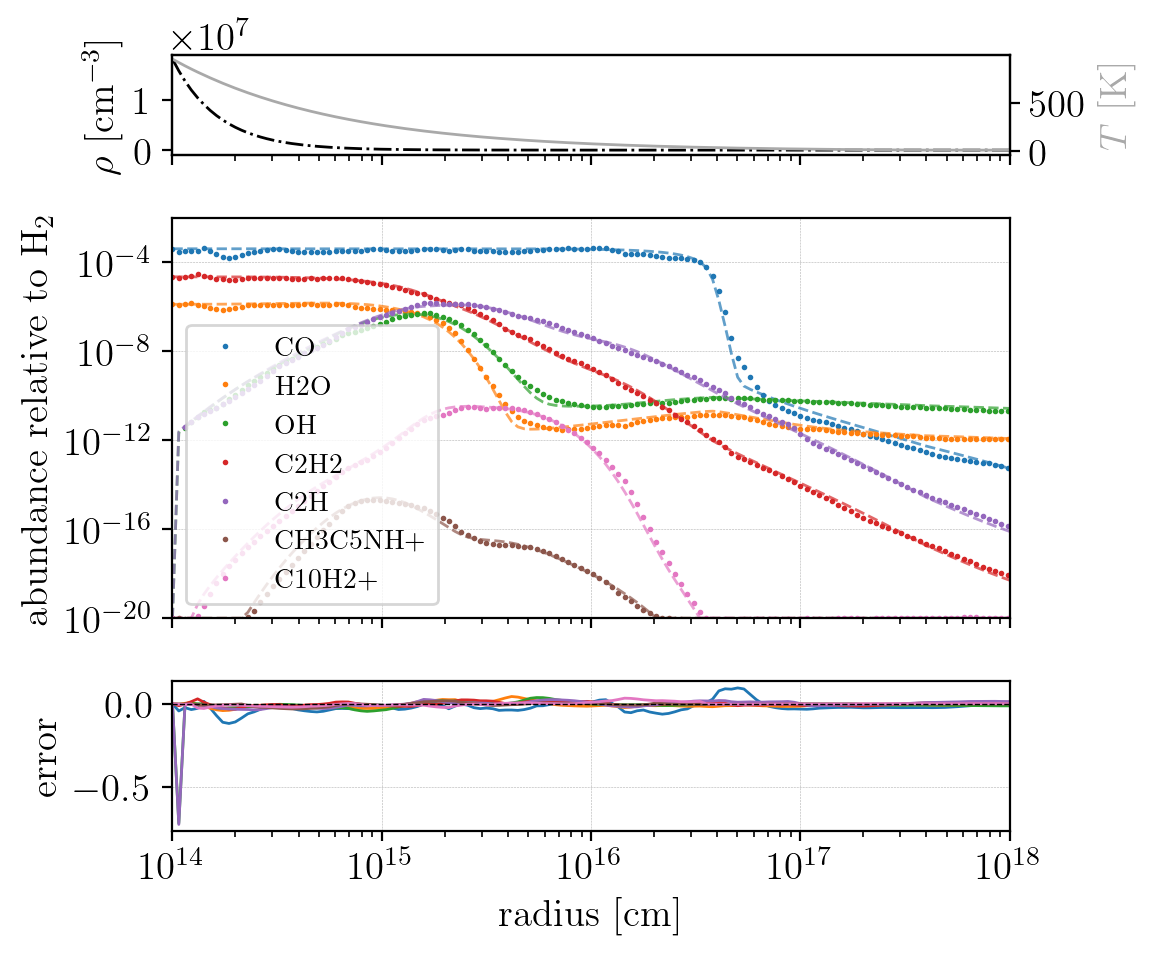

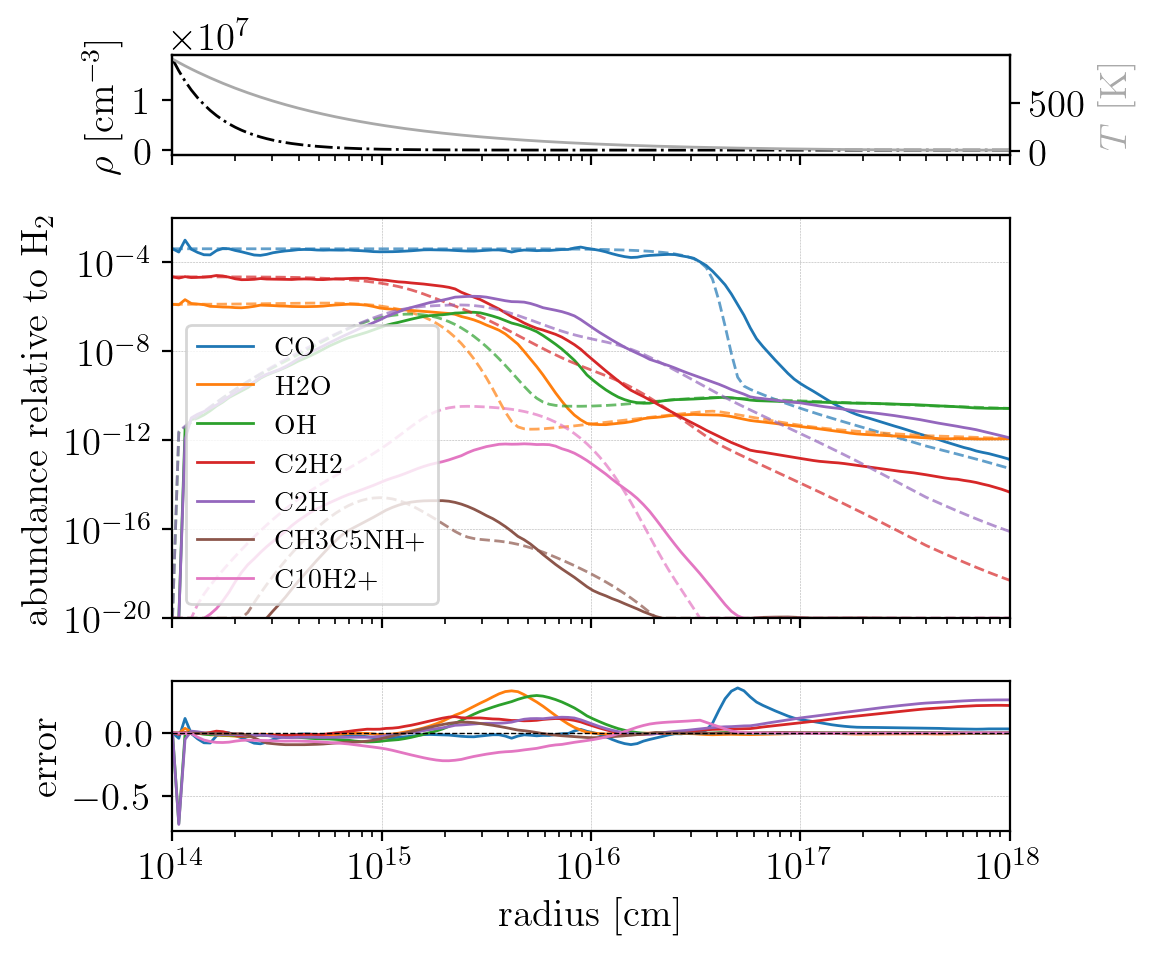

In [12]:
testpath = 'low_dens'

macetime = test.test_model(model,testpath, meta, plotting=True, save = True, inpackage = True)